# XGBOOST 
설명 : https://www.youtube.com/watch?v=Dhwmd_IyW3g

# 1. 파이썬 library 불러오기 

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

# 2. 데이터 불러오기 

In [1]:
# 데이터 로딩하기
# n_ay1합쳐놓은 파일에서 1열을 삭제하고 로딩함 = 1열 무의미해서...
train = pd.read_csv("C:/Users/kimjimin/Desktop/bcbc/n_ay1/n_ay1.csv")
test = pd.read_csv("C:/Users/kimjimin/Desktop/bcbc/champion_data/test/test_activity.csv")
train.shape, test.shape #train,test의 행과열 감상 

NameError: name 'pd' is not defined

In [3]:
warnings.filterwarnings('ignore') #ignore warning messages 

In [4]:
train.columns # 데이터 살펴보기

Index(['wk', 'acc_id', 'cnt_dt', 'play_time', 'npc_exp', 'npc_hongmun',
       'quest_exp', 'quest_hongmun', 'item_hongmun', 'game_combat_time',
       'get_money', 'duel_cnt', 'duel_win', 'partybattle_cnt',
       'partybattle_win', 'cnt_enter_inzone_solo', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_inzone_normal', 'cnt_enter_raid',
       'cnt_enter_raid_light', 'cnt_enter_bam', 'cnt_clear_inzone_solo',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled',
       'cnt_clear_inzone_normal', 'cnt_clear_raid', 'cnt_clear_raid_light',
       'cnt_clear_bam', 'normal_chat', 'whisper_chat', 'district_chat',
       'party_chat', 'guild_chat', 'faction_chat', 'cnt_use_buffitem',
       'gathering_cnt', 'making_cnt', 'label'],
      dtype='object')

In [5]:
test.columns # 데이터 살펴보기 

Index(['wk', 'acc_id', 'cnt_dt', 'play_time', 'npc_exp', 'npc_hongmun',
       'quest_exp', 'quest_hongmun', 'item_hongmun', 'game_combat_time',
       'get_money', 'duel_cnt', 'duel_win', 'partybattle_cnt',
       'partybattle_win', 'cnt_enter_inzone_solo', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_inzone_normal', 'cnt_enter_raid',
       'cnt_enter_raid_light', 'cnt_enter_bam', 'cnt_clear_inzone_solo',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled',
       'cnt_clear_inzone_normal', 'cnt_clear_raid', 'cnt_clear_raid_light',
       'cnt_clear_bam', 'normal_chat', 'whisper_chat', 'district_chat',
       'party_chat', 'guild_chat', 'faction_chat', 'cnt_use_buffitem',
       'gathering_cnt', 'making_cnt'],
      dtype='object')

In [2]:
# train, test셋의 ID는 index로 만든 뒤 컬럼에선 제거합니다.
train.index = train.acc_id
test.index = test.acc_id
train.drop("acc_id", axis=1, inplace=True)
test.drop("acc_id", axis=1, inplace=True)

NameError: name 'train' is not defined

##인덱스처리 이유.... 궁금하다 

인덱스 말그대로 목차를 말하는 것이다.
데이터베이스 즉 데이터를 저장하는 장소인데 우리가 데이터를 막 저장했는데 
왜 저장할까? 바로 거기서 찾아서 쓸려고 하는 것이다.
즉 정보검색을 위해서 우리는 여러가지 방법이 있는 그냥 순서대로 일일히 비교해서 검색하는 방법과
두번쨰로 색인 즉 인덱스를 남겨서 그걸 비교하면서 찾는 방법이 있다.
어느 것이 더 빠를 것인가? 당연히 인덱스를 남겨서 찾는 부분이 더 빠르다.

In [7]:
train['label'].value_counts() # label이 어떻게 생겼는지 감상 

retained    167110
2month       98642
month        97473
week         77098
Name: label, dtype: int64

# one-hot-encoding
데이터에는 수치형 데이터와 텍스트 데이터나 범주형 데이터가 있다. 
머신러닝이나 딥러닝 알고리즘은 수치로 된 데이터만 이해할 수 있다.
그래서 기계가 이해할 수 있는 형태로 데이터를 변환해 주어야 하는데 범주형 데이터는 원핫인코딩 형태로 변환해 준다.
원핫인코딩이란 해당되는 하나의 데이터만 1로 변경해 주고 나머지는 0으로 채워주는 것을 뜻한다.

one-hot-encoding-1은 4가지 이탈기준을 01로 구분한것이고
one-hot-encoding-2는 이탈과 비이탈기준으로 01을 구분한것이다. 
분석력이 더 좋게 위해서 one-hot-encoding-2 를 사용하여 돌리기로 한다. 
BUT! 현재 코드는 0,1의 비율이 맞지 않는데 (=한쪽으로 너무 쏠림)
샘플 추출시 이거 해결하는 코드가 있다고 함 

In [8]:
## one-hor-encoding-1
## pd.get_dummies로 One-hot 인코딩
#label_one_hot_encoded = pd.get_dummies(train.label) 

## 원래 데이터와 비교식으로 보여주기용 데이터프레임
#label_with_onehot = pd.concat(
#	[DataFrame(train.label), label_one_hot_encoded],
#	axis=1) 
#label_with_onehot.head(10)

In [9]:
#one-hot-encoding-2
train.loc[train["label"] == "retained", "label"] = 0
train.loc[train["label"] == "2month", "label"] = 1
train.loc[train["label"] == "month", "label"] = 1
train.loc[train["label"] == "week", "label"] = 1
train['label'].value_counts() #0과 1의 갯수 확인 

1    273213
0    167110
Name: label, dtype: int64

In [10]:
#그리고 train셋의 TARGET 컬럼은 별도로 분류합니다.
# TARGET컬럼 만들기 #label 타겟처리
y = train.label
train = train.iloc[:,:-1]
train.shape, test.shape #train,test의 행과열 감상 

((440323, 37), (175631, 37))

In [11]:
#### 여기 잘 이해 안감 ㅜ 
# 데이터를 간단히 살펴보도록 하겠습니다.
# 우선 데이터 타입먼저 확인해보겠습니다. 모두 수치형 데이터인 것을 알 수 있습니다.
# 별도의 Ont-Hot-Encoding은 필요하지 않은 것으로 보입니다.
# (물론 수치형 데이터이지만 명목형 변수와 다름없어서 One-Hot-Encode해야하는 경우도 있겠지만
# 컬럼의 의미를 모르는 상태에서는 확인이 어렵습니다. 우선 모두 수치로 처리합니다)
from pandas import DataFrame
types = DataFrame(train.dtypes).reset_index()
types.columns = ["Features","Types"]
types.groupby("Types").size()

Types
int64       2
float64    35
dtype: int64

In [12]:
#### 여기는 이거 실행하면 안되는것 아닌가 싶은데 실행시켜도 변화 없음 ㅋㅋㅋ
#혹시 모를 경우를 대비한 데이터 전처리를 수행합니다.
#모든 컬럼값이 동일한 케이스, 즉 실질적으로 constant인 컬럼이 있을 수 있습니다.
#해당 컬럼들을 확인, 미리 제거합니다.

train = train.loc[:,train.apply(lambda x:len(x.unique()))>1]
test = test.loc[:,test.apply(lambda x:len(x.unique()))>1]
train.shape, test.shape #train,test의 행과열 감상 

((440323, 37), (175631, 37))

constant인 컬럼 이 뭘 까? 

In [13]:
#제거한 결과, train셋에서는 constant가 아니었지만 
#(=1개 이상의 값이 있었지만) test 셋에서는 constant인 케이스가 있습니다. 
#이 결과 test셋에서 11개의 feature가 더 제거된 것을 알 수 있습니다. 
#test 셋에서 constant라면 train셋에서 학습하는 것이 의미가 없습니다. 
#train 셋의 컬럼을 test의 컬럼과 동일하게 만들어줍니다.

# test컬럼에는 없지만 train에만 있는 컬럼 제거하기 -> 전처리임 
testCols = test.columns
train = train[testCols]
train.shape, test.shape

((440323, 37), (175631, 37))

In [14]:
#Recall, Precision and F1_score
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

# 튜닝 설명 
#n_estimators
 - 몇번이나 모델링을 할 것인지 주기를 결정한다.
 - underfitting- traing data와 new data에 대해 예측이 떨어짐
 - overfitting- traing data에 대해서는 정확하지만 새 데이터에 대해 오히려 부정확한 결과를 낳음.
 - 일반적으로 100-1000이 적합한 learning rate다.

#learning_rate
 - 이전트리의 오차를 보정하는 정도를 조절 
 - n_estimators와 매우 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서더 많은 트리를 추가해야한다. n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그래디언트부스팅에서 n_estimators를 크게하면 모델이 복잡해지고 과대적합될 가능성이 높아진다. 
 - 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 
learning_rate를 찾는 것이다. 

#max_depth [default=6] (Should be tuned using CV) 
 - 트리의 최대 깊이.
 - 일반적으로 3-10
 - 트리의 복잡도를 낮추는 명령어이다. 통상 그래디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 한다.
    
#subsample [default=1]
   - 각 트리마다의 관측 데이터 샘플링 비율.
   - 값을 적게 주면 over-fitting을 방지하지만 값을 너무 작게 주면 under-fitting.
   - 일반적으로 0.5-1
    
#colsample_bytree [default=1]
   - 각 트리마다의 feature 샘플링 비율.
   - 일반적으로 0.5-1

#objective [default=reg:linear]
   - binary:logistic : 이진 분류를 위한 로지스틱 회귀, 예측된 확률을 반환한다. (not class)
   - multi:softmax : softmax를 사용한 다중 클래스 분류, 예측된 클래스를 반환한다. (not probabilities)
   - multi:softprob : softmax와 같지만 각 클래스에 대한 예상 확률을 반환한다.
        
#eval_metric [default according to objective]
   - 회귀 분석인 경우 'rmse'를, 클래스 분류 문제인 경우 'error'를 default로 사용.
   - rmse : root mean square error 제곱 평균 제곱근 오차
   - mae : mean absolute error 절대 오차
   - logloss : negative log-likelihood 음수 대수 (log-likelihood)
   - error : Binary classification error rate (0.5 threshold)이진 분류 오류율 (0.5 임계 값)
   - merror : Multiclass classification error rate 멀티 클래스 분류 오류율
   - mlogloss : Multiclass logloss 멀티 클래스 로그 손실
   - auc : Area under the curve 곡선 아래 영역

# 테쓰또 F1 스코어하는방법 

In [ ]:
###########################################

In [15]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size = 0.20, random_state = 0)
eval_set = [(x_train, y_train), (x_test,y_test)]

In [16]:
xgboost = xgb.XGBClassifier(objective="binary:logistic",min_child_weight=1, max_depth=5, learning_rate=.1, 
                            n_estimators=100, n_jobs=-1,gamma=0, nthread=3, scale_pos_weight=1, seed=27)

In [17]:
xgboost.fit(x_train,y_train,eval_set=eval_set, eval_metric="auc", early_stopping_rounds=25)

#Accuracy

print("\n### Accuracy: ###")

[0]	validation_0-auc:0.835508	validation_1-auc:0.836366
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 25 rounds.
[1]	validation_0-auc:0.848136	validation_1-auc:0.848579
[2]	validation_0-auc:0.84898	validation_1-auc:0.849159
[3]	validation_0-auc:0.85121	validation_1-auc:0.85139
[4]	validation_0-auc:0.851436	validation_1-auc:0.851516
[5]	validation_0-auc:0.85436	validation_1-auc:0.853686
[6]	validation_0-auc:0.855643	validation_1-auc:0.855131
[7]	validation_0-auc:0.855558	validation_1-auc:0.854896
[8]	validation_0-auc:0.856286	validation_1-auc:0.855684
[9]	validation_0-auc:0.858358	validation_1-auc:0.857746
[10]	validation_0-auc:0.858717	validation_1-auc:0.858374
[11]	validation_0-auc:0.863172	validation_1-auc:0.863014
[12]	validation_0-auc:0.865056	validation_1-auc:0.864935
[13]	validation_0-auc:0.865344	validation_1-auc:0.865225
[14]	validation_0-auc:0.866872	validation_1-auc:0.866586
[1

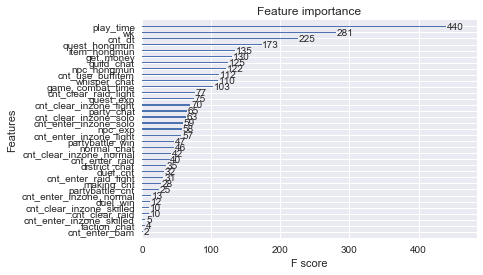

In [21]:
from xgboost import plot_importance
# Feature importance
# Plot feature importance
plot_importance(xgboost)
plt.show()

In [24]:
Imps = DataFrame({"Features":train.columns, 
                  "Imps":xgboost.feature_importances_}) \
                  .sort_values(by="Imps", ascending=False)
Imps.head(10)

,Features,Imps
2,play_time,0.153739
0,wk,0.098183
1,cnt_dt,0.078616
6,quest_hongmun,0.060447
7,item_hongmun,0.047170
9,get_money,0.045423
32,guild_chat,0.043676
4,npc_hongmun,0.042628
34,cnt_use_buffitem,0.039133
29,whisper_chat,0.038435


In [25]:
# 변수 중요도가 0이 아닌 변수 목록을 list로 만들기
impVars = list(Imps[Imps.Imps != 0].iloc[:,0])

# 해당 변수로만 데이터셋 만들기
train = train[impVars]
test = test[impVars]

train.shape, test.shape

((440323, 35), (175631, 35))

In [19]:
y_pred = xgboost.predict(x_test)
# True Positive 
tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
# True Negative
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
# False Positive
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
 # False Negative
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))

print("False positive:",fp/tp)
print("False Negative:",fn/tn)
print("Sum false:",fp+fn)
print("f1_score:",2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn)))))

print("\n### Compute prediction: ###")

False positive: 0.2119128270007754
False Negative: 0.24377548364708945
Sum false: 16005
f1_score: 0.8596261960935649

### Compute prediction: ###


base model을 위한 데이터 전처리는 여기까지 완료하고, 이제 본격적으로 모델을 만들어보도록 하겠습니다. base model을 위한 도구로는 이미지 문제를 제외한 일반적인 tabular 데이터를 활용한 대회에서 95% 이상의 캐글 우승자들이 메인 모델로 활용한 xgboost입니다. 우선..

1. 다양한 파라미터 조합의 성능을 확인해보고
2. 최적의 성능을 보여주는 파라미터 조합을 발견한 후
3. 해당 파라미터 조합으로 5-fold-validation을 통해 submission 해보도록 하겠습니다.

 우선 최적의 파라미터 조합을 찾아보겠습니다.

# 최적의 파라미터 찾기 

In [26]:
## 성능 검증용 펑션 (roc_auc_score) 및 학습셋/검증셋 구분 위한 펑션 (train_test_split) 호출

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

## 학습셋/검증셋 구분
Xtrain, Xtest, ytrain,ytest = train_test_split(train,y,test_size=0.3)

## 파라미터 조합을 저장할 DataFrame 만들어두기
parameters = DataFrame({
                                         "3colsample":[0],
                                         "4max_depth" : [0],
                                         "5gamma" : [0],
                                         "6reg_l2" : [0],
                                         "7reg_l1" : [0],
                                         "8AUC":[0]})

## 검증할 파라미터 조합 List로 만들기
colsample_bytree = [0.4, 0.6, 0.8]
max_depth = [4, 8,12]
gamma = [0,2]
reg_l2 = [0,0.5]
reg_l1 = [0,0.5]

- colsample_by_tree : 하나의 tree 적합시 전체 feature 중 몇 %를 활용할 것인지 설정합니다. 비중을 낮출수록 다양한 모형을 만들게 됩니다.
- max_depth : 하나의 트리를 만들때 얼마나 깊게 만들지를 설정합니다.
- gamma : 한 번의 split을 성사시키기 위한 loss 감소의 최소값입니다. 크면 클수록 보수적으로 트리를 나눈게 됩니다. 
- lambda (reg_l2) : L2 regularization 계수입니다.
- alpha (reg_l1) : L1 regularization 계수입니다.


In [ ]:
import time

i = 0

## 파라미터 조합별 반복 설정..
for colsample in colsample_bytree:
    for max in max_depth:
        for gam in gamma:
            for l2 in reg_l2:
                for l1 in reg_l1:
                    
                    ## 파라미터 설정
                    params = {"learning_rate" : 0.02,
                                             "n_estimators" : 3000,
                                             "max_depth" : max,
                                             "colsample_bytree" : colsample,
                                             "gamma" : gam,
                                              "lambda" : l2,
                                              'alpha' : l1, "n_jobs" : 14,
                                             "objective" : "binary:logistic"}
                    
                    clf = xgb.XGBClassifier(**params)
                        
                    s = time.time()  ## 적합 시작시간 저장
                    clf.fit(Xtrain, ytrain,
                                        eval_set = [(Xtrain,ytrain), (Xtest,ytest)],
                                        ## 적합중 early-stopping 하기위한 set 지정
                                        eval_metric='auc',
                                        ## early-stopping에 활용할 성능지표
                                        early_stopping_rounds=100,
                                        ## early-stopping시 100회 적합시 성능개선 없으면 학습 종료하도록 설정
                                        verbose=500
                                        ## 진행상황 500회마다 출력 
                                        )
                    print(time.time() - s)  ## 적합 소요시간 출력

                    r =  DataFrame({
                                                      "3colsample":[colsample],
                                                      "4max_depth" : [max],
                                                      "5gamma" : [gam],
                                                      "6reg_l2" : [l2],
                                                      "7reg_l1" : [l1],
                                                     #"8AUC" : roc_auc_score(ytest,clf.predict_proba(Xtest)[:,1])
                                                       })
                    parameters = r.append(parameters)
                            
                    print(i, "finished")
                    i = i+1

[0]	validation_0-auc:0.799643	validation_1-auc:0.800269
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[500]	validation_0-auc:0.881992	validation_1-auc:0.882173
[1000]	validation_0-auc:0.889994	validation_1-auc:0.889177
[1500]	validation_0-auc:0.894538	validation_1-auc:0.892904
[2000]	validation_0-auc:0.897533	validation_1-auc:0.895166
[2500]	validation_0-auc:0.899897	validation_1-auc:0.896862
[2999]	validation_0-auc:0.90171	validation_1-auc:0.898026
644.3571403026581
0 finished
[0]	validation_0-auc:0.799643	validation_1-auc:0.800269
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[500]	validation_0-auc:0.881992	validation_1-auc:0.882173
[1000]	validation_0-auc:0.889994	validation_1-auc:0.889177
[1500]	validation_0-auc:0.894538	validation_1-auc:0.892904
[2000]	validati